# Setting Up the Problem

#### Objective: Understand and establish the baseline for your chosen dataset

In [84]:
# ! pip install datasets

In [2]:
# imports for Part I
import datasets
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## OWN FUNCTIONS
# import support_functions
# from support_functions import *

In [86]:
# imports for Part II
#! pip install transformers==4.37.2
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from transformers import TFDistilBertModel
from keras.utils import custom_object_scope
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from gensim import corpora, models
from gensim.matutils import Sparse2Corpus
from scipy.sparse import csr_matrix
import random
from sklearn.metrics import confusion_matrix
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import spacy
sp = spacy.load('en_core_web_sm')
from tqdm import tqdm
from tensorflow.keras.optimizers import Adam


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [87]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from transformers import TFDistilBertModel
from keras.utils import custom_object_scope
from keras.models import load_model
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from gensim import corpora, models
from gensim.matutils import Sparse2Corpus
from scipy.sparse import csr_matrix
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from datasets import load_dataset
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import spacy
sp = spacy.load('en_core_web_sm')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
df = load_dataset("carblacac/twitter-sentiment-analysis")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for carblacac/twitter-sentiment-analysis contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/carblacac/twitter-sentiment-analysis
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the ne

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/149985 [00:00<?, ? examples/s]

Map:   0%|          | 0/61998 [00:00<?, ? examples/s]

Creating json from Arrow format:   0%|          | 0/120 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/62 [00:00<?, ?ba/s]

Generating train split:   0%|          | 0/119988 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/29997 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/61998 [00:00<?, ? examples/s]

### Characteristics of the dataset

**b. Dataset Description (0.5 points): Provide a brief overview of your dataset, including size, class distribution, and any peculiar characteristics. Include basic descriptive statistics.**

##### TSATC: Twitter Sentiment Analysis Training Corpus     
Original DATASET contains 1,578,627 classified tweets (1 for positive and 0 for negative sentiment).

Our dataset has already been randomly sampled, cleaned, and split into training and testing sets. Both positive and negative classes are well balanced within each subset, and the training subset has been further divided into an 80% training set and a 20% validation set.  

This dataset is an aggregation of two twitter sentiment analysis datasets:  
- University of Michigan Sentiment Analysis competition on Kaggle: https://inclass.kaggle.com/c/si650winter11  
- Twitter Sentiment Corpus by Niek Sanders: http://www.sananalytics.com/lab/twitter-sentiment/

  
Languages: English

In [6]:
## Defining train, validation and test sets
train_data = df['train']['text']
train_labels = df['train']['feeling']

validation_data = df['validation']['text']
validation_labels = df['validation']['feeling']

test_data = df['test']['text']
test_labels = df['test']['feeling']

## Creating Dataframes
df_train = pd.DataFrame({'text':train_data,'label':train_labels})
df_val = pd.DataFrame({'text':validation_data,'label':validation_labels})
df_test = pd.DataFrame({'text':test_data,'label':test_labels})

df

DatasetDict({
    train: Dataset({
        features: ['text', 'feeling'],
        num_rows: 119988
    })
    validation: Dataset({
        features: ['text', 'feeling'],
        num_rows: 29997
    })
    test: Dataset({
        features: ['text', 'feeling'],
        num_rows: 61998
    })
})

### Dataset size

In [7]:
total_rows = len(train_labels) + len(test_labels) + len(validation_labels)
# Calculate train size including validation
Train_size = len(train_labels) + len(validation_labels)
# Calculate Summary
summary_df = pd.DataFrame({'SET': ['TRAIN','TEST', 'TOTAL'], 'ROWS': [Train_size, len(test_labels), total_rows], 'SPLIT': [Train_size/total_rows, len(test_labels)/total_rows,total_rows/total_rows]})
print('Dataset Split [TRAIN, TEST]')
display(summary_df.round(3))

## TRAIN SPLIT
summary_df_train = pd.DataFrame({'SET': ['train','validation', 'TRAIN'], 'ROWS': [len(train_labels), len(validation_labels), Train_size], 'SPLIT': [len(train_labels)/Train_size, len(validation_labels)/Train_size,Train_size/Train_size]})
print('TRAIN Split [train, validation]')
display(summary_df_train.round(3))

Dataset Split [TRAIN, TEST]


,SET,ROWS,SPLIT
0,TRAIN,149985,0.708
1,TEST,61998,0.292
2,TOTAL,211983,1.000


TRAIN Split [train, validation]


,SET,ROWS,SPLIT
0,train,119988,0.8
1,validation,29997,0.2
2,TRAIN,149985,1.0


### Class distribution

In [8]:
# ## Class balance of our datasets
# print('train')
# class_prop(train_labels)
# print('validation')
# class_prop(validation_labels)
# print('test')
# class_prop(test_labels)

### Distribution of text lengths (train set only)

In [9]:
df_train['text_length']= [len(i.split()) for i in df_train['text']]
df_val['text_length']= [len(i.split()) for i in df_val['text']]
df_test['text_length']= [len(i.split()) for i in df_test['text']]
#Calculating Answer Length

In [10]:
for i in df_train['text'][0:5]:
    print(i.split(),'length: ', len(i.split()) )

['@fa6ami86', 'so', 'happy', 'that', 'salman', 'won.', 'btw', 'the', '14sec', 'clip', 'is', 'truely', 'a', 'teaser'] length:  14
['@phantompoptart', '.......oops....', 'I', 'guess', "I'm", 'kinda', 'out', 'of', 'it....', 'Blonde', 'moment', '-blushes-', 'epic', 'fail'] length:  14
['@bradleyjp', 'decidedly', 'undecided.', 'Depends', 'on', 'the', 'situation.', 'When', "I'm", 'out', 'with', 'the', 'people', "I'll", 'be', 'in', 'Chicago', 'with?', 'Maybe.'] length:  19
['@Mountgrace', 'lol', 'i', 'know!', 'its', 'so', 'frustrating', 'isnt', 'it?!'] length:  9
['@kathystover', "Didn't", 'go', 'much', 'of', 'any', 'where', '-', 'Life', 'took', 'over', 'for', 'a', 'while'] length:  14


Summary Statistics of text_length for positive(1) and negative(0) tweets
            mean  median       std  min  max
label                                       
0      13.730761    13.0  7.035053    1   57
1      12.862760    12.0  6.810572    1  111
   
Plot text_length distribution for positive(1) and negative(0) tweets


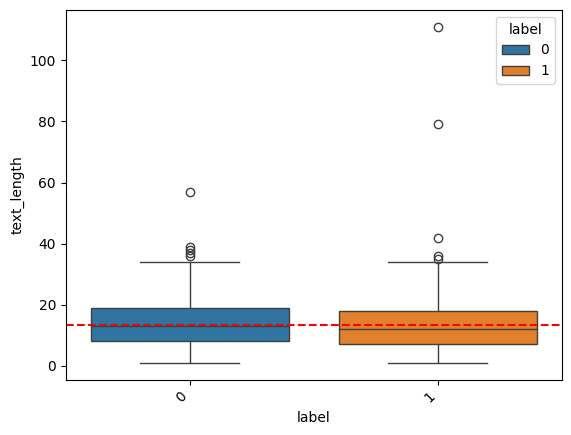

In [11]:
## Summary statistics for text_length
# Calculate multiple statistics
print('Summary Statistics of text_length for positive(1) and negative(0) tweets')
statistics = df_train.groupby('label')['text_length'].agg(['mean', 'median','std', 'min', 'max'])
# Display the result
print(statistics)

print('   ')

print('Plot text_length distribution for positive(1) and negative(0) tweets')
sns.boxplot(data=df_train, x='label', y='text_length',hue = 'label')
#plt.xlim(0, None)
plt.xticks(rotation=45, ha='right')
# Add a horizontal line at the mean of 'reply_length'
mean_reply_length = df_train['text_length'].mean()
plt.axhline(y=mean_reply_length, color='red', linestyle='--', label=f'Mean text Length ({mean_reply_length:.2f})')
# Show the plot
plt.show()

## Data Cleaning
Twitter text requires multiple transformations prior to Preprocessing

In [12]:
! pip install ekphrasis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.8 MB/s eta 0:00:00


In [13]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons


# Create a TextPreProcessor instance
text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
               'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
              'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens

    # corpus from which the word statistics are going to be used for word segmentation
    segmenter="twitter",
    # corpus from which the word statistics are going to be used for spell correction
    corrector="twitter",

    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words

    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,

    # list of dictionaries, for replacing tokens extracted from the text, with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons],
    #Remove emoticon
    pre_processor=[lambda x: x.replace('＼(^o^)／', '')]
)

# Pre-process the sentence using TextPreProcessor

def extract_clean(text):
    cleaned_text = ' '.join([word.split('<')[0] for word in text])
    return cleaned_text

def extract_emotions(text):
    emoji_expressions = [token for token in text if token in emoticons.values()]
    return emoji_expressions

def clean_string(text):
    cleaned_text = re.sub(r'\s+', ' ', text)
    cleaned_text = cleaned_text.strip()
    return cleaned_text

def flatten_emotions(emotion_list):
    # Convert the list of emotions into a string
    emotion_string = ', '.join(emotion_list)
    # Use regular expression to find all words inside angle brackets
    emotions = re.findall(r'<([^>]*)>', emotion_string)
    unique_emotions = list(set(emotions))
    combined_emotions = ', '.join(unique_emotions)
    return combined_emotions


def clean_text(df):
# Pre-process all the sentences in df_train['text']
    df['preprocessed_text'] = [text_processor.pre_process_doc(text) for text in df['text']]
    df['clean_text'] = df['preprocessed_text'].apply(extract_clean).apply(clean_string)

    #Getting Hashtags
    df['hashtag'] = df['text'].apply(lambda x: re.findall(r'#(\w+)', x))
    df['hashtag'] = [' '.join(i) for i in df['hashtag']]

    # Iterate through the preprocessed text
    df['emotions'] = df['preprocessed_text'].apply(extract_emotions)
    df['clean_emotions'] = df['emotions'].apply(flatten_emotions)

    df = df[['text','label','text_length','clean_text','clean_emotions','hashtag']]
    return df

df_train = clean_text(df_train)
df_val = clean_text(df_val)
df_test = clean_text(df_test)


/usr/local/lib/python3.10/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt


/usr/local/lib/python3.10/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading twitter - 1grams ...


## DATA EXPLORATION

#### Hashtags

- 98% of the tweets have no hashtags. Most likely they have been already cleaned.
- Doesn't make sense to keep diving for more insigths.

In [14]:
# hashtag_freq = freq_table(df_train,'hashtag')
# hashtag_freq = hashtag_freq.sort_values(by='perc',ascending=False)
# hashtag_freq['accum'] = hashtag_freq['perc'].cumsum()
# print('top 10 hashtags')
# display(hashtag_freq[0:10])

#### EMOTIONS

- 98% of the tweets have no emotions. Most likely have been already removed.
- Because they directly express the sentiment of the text, we'll concatenate them to our cleaned tweet corpus.

In [15]:
# emotions_freq = freq_table(df_train,'clean_emotions')
# emotions_freq = emotions_freq.sort_values(by='perc',ascending=False)
# emotions_freq['accum'] = emotions_freq['perc'].cumsum()
# print('top 10 emotions')
# display(emotions_freq[0:10])

In [16]:
#Concatenate text with emotions
df_train['text_emotion'] = df_train['clean_text']+' '+df_train['clean_emotions']
df_val['text_emotion'] = df_val['clean_text']+' '+df_val['clean_emotions']
df_test['text_emotion'] = df_test['clean_text']+' '+df_test['clean_emotions']


<ipython-input-16-838d5037cb64>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text_emotion'] = df_test['clean_text']+' '+df_test['clean_emotions']


### Preprocessor

In [17]:
#Defining preprocessing class to be included in Pipeline later.
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import string
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


## Text mining - Preprocessing, CountVectorizing and tf-idf

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.punctuations = set(string.punctuation)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        preprocessed_texts = []
        for text in X:
            # Convert text to lowercase
            text = text.lower()
            # Tokenize text
            tokens = word_tokenize(text)
            # Remove stopwords and apply lemmatization
            filtered_tokens = [self.lemmatizer.lemmatize(word) for word in tokens if word not in self.stop_words]
            # Join tokens back into a string
            preprocessed_text = ' '.join(filtered_tokens)
            preprocessed_texts.append(preprocessed_text)

        return preprocessed_texts


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#### Exploring positive and negative words using WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


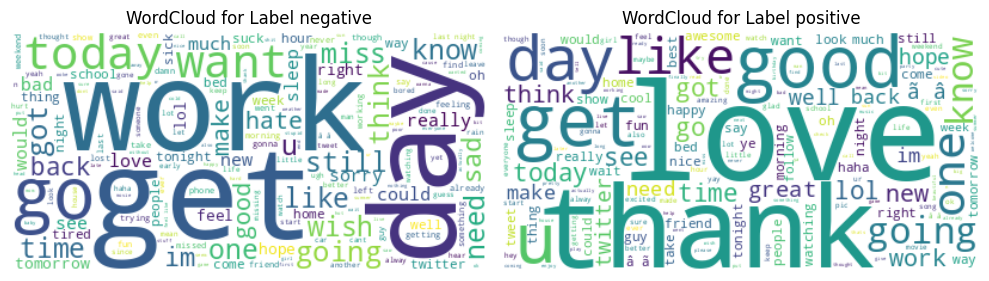

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


labels = {0: 'negative', 1: 'positive'}

# Prepare data for wordclouds
label_data = defaultdict(lambda: '')

for text, label in zip(df_train['clean_text'], df_train['label']):
    label_data[label] += text

# Generate and plot wordclouds for each label
fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # Create 2x2 subplots
axs = axs.flatten()  # Flatten the axis array

for ax, (label, text) in zip(axs, label_data.items()):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('WordCloud for Label {}'.format(labels.get(label)))
    ax.axis('off')

plt.tight_layout()
plt.show()

## Exploring positive and negative words using Countvectorizer + TF-IDF

In [19]:
## Preprocessing texts
pipeline = Pipeline([
        ('prepro', TextPreprocessor()),
        ("vect", CountVectorizer(ngram_range=(1, 2), min_df=0.005, max_df=0.97)),
        ("tfidf", TfidfTransformer(use_idf=True, norm='l1'))
    ]
)

# Fit the pipeline on the training data
pipeline.fit(df_train['text_emotion'])

# Transform the validation data using the fitted pipeline
train_tfidf = pipeline.transform(df_train['text_emotion'])
validation_tfidf = pipeline.transform(df_val['text_emotion'])
test_tfidf = pipeline.transform(df_test['text_emotion'])


# Exploring
train_tfidf=train_tfidf.toarray()
print("document term matrix has size", train_tfidf.shape)
#print(pipeline.named_steps['vect'].get_feature_names_out())

document term matrix has size (119988, 240)


In [20]:
df_train

,text,label,text_length,clean_text,clean_emotions,hashtag,text_emotion
0,@fa6ami86 so happy that salman won. btw the 1...,0,14,so happy that salman won . btw the 1 4 sec cli...,,,so happy that salman won . btw the 1 4 sec cli...
1,@phantompoptart .......oops.... I guess I'm ki...,0,14,. oops . i guess i am kinda out of it . blonde...,,,. oops . i guess i am kinda out of it . blonde...
2,@bradleyjp decidedly undecided. Depends on the...,1,19,decidedly undecided . depends on the situation...,,,decidedly undecided . depends on the situation...
3,@Mountgrace lol i know! its so frustrating isn...,1,9,lol i know ! its so frustrating isnt it ? !,,,lol i know ! its so frustrating isnt it ? !
4,@kathystover Didn't go much of any where - Lif...,1,14,did not go much of any where - life took over ...,,,did not go much of any where - life took over ...
...,...,...,...,...,...,...,...
119983,I so should be in bed but I can't sleep,0,10,i so should be in bed but i can not sleep,,,i so should be in bed but i can not sleep
119984,@mickeymab mine's in my profile - '77cb550 and...,1,24,mine ' s in my profile - ' 7 7 cb550 and hecto...,,,mine ' s in my profile - ' 7 7 cb550 and hecto...
119985,@stacyreeves Awe... I wish I could. I am here...,0,25,awe . i wish i could . i am here this weekend ...,,1,awe . i wish i could . i am here this weekend ...
119986,Is it me or is Vodafone UK business support ru...,0,18,is it me or is vodafone uk business support ru...,,,is it me or is vodafone uk business support ru...


## Random Classifier Performance

Random Classifier Performance (0.25 points): Calculate the expected performance of a random classifier for your dataset to set a benchmark. The calculation should include an implementation.

**pending**: include preprocessing in the pipeline to properly treat tweets.

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
class Metrics:
    def __init__(self):
        self.results = {}

    def run(self, y_true, y_pred, method_name, average='macro'):
        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average=average)
        recall = recall_score(y_true, y_pred, average=average)
        f1 = f1_score(y_true, y_pred, average=average)

        # Store results
        self.results[method_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
        }

    def plot(self):
        # Create subplots
        fig, axs = plt.subplots(2, 2, figsize=(15, 10))

        # Plot each metric
        for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1']):
            ax = axs[i//2, i%2]
            values = [res[metric] * 100 for res in self.results.values()]
            ax.bar(self.results.keys(), values)
            ax.set_title(metric)
            ax.set_ylim(0, 100)

            # Add values on the bars
            for j, v in enumerate(values):
                ax.text(j, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

            # Rotate x ticks vertically
            ax.tick_params(axis='x', rotation=90)

        plt.tight_layout()
        plt.show()

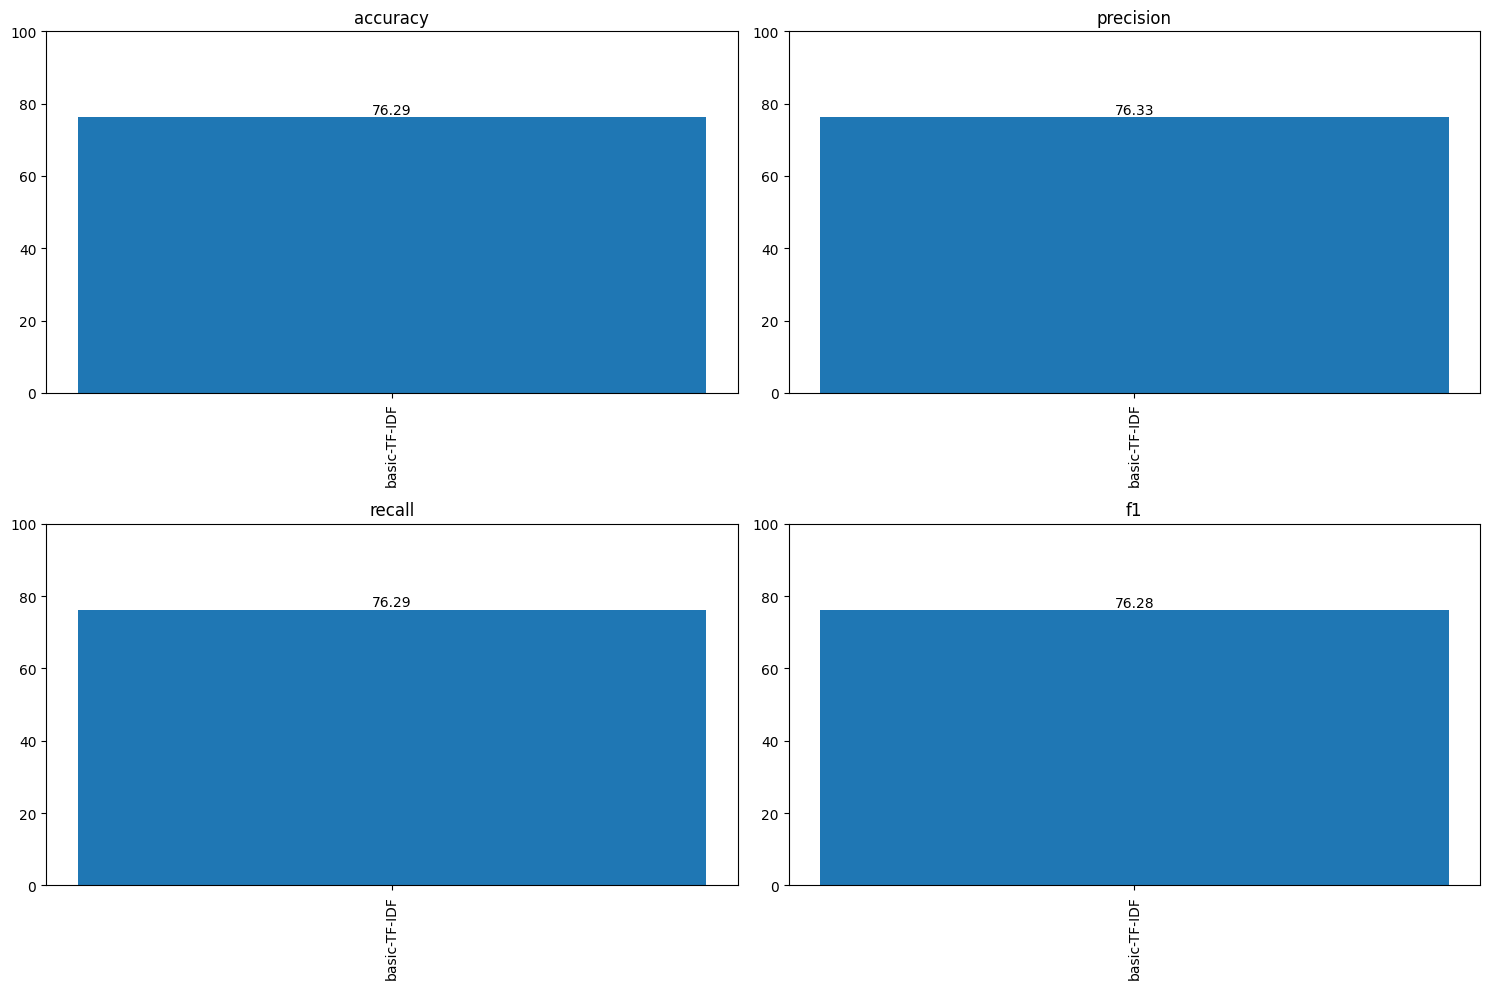

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create a pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('prepro', TextPreprocessor()),
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2),
                              min_df=5,
                              stop_words='english')),
    ('clf', LogisticRegression(solver='liblinear')),
])

# Fit the pipeline on the training data
pipeline.fit(train_data, train_labels)

valid_preds = pipeline.predict(validation_data)

metrics_val= Metrics()
metrics_val.run(validation_labels, valid_preds, "basic-TF-IDF")
metrics_val.plot()

## Baseline Implementation

Baseline Implementation (0.5 points): Develop a rule-based classifier as a baseline. Discuss its performance in the context of the dataset's complexity and compare it with human-level performance if available.

In [23]:
# from spacy.matcher import Matcher
# from spacy.matcher import PhraseMatcher
# import spacy

# #python -m spacy download en_core_web_sm - Run on Terminal
# nlp = spacy.load("en_core_web_sm")

# # Create a new Matcher
# matcher = Matcher(nlp.vocab)

In [24]:
# ##SKELETON for Rule-based classifier

# positive_patterns = [
#     [{"LOWER": "good"}]
#     # Add more patterns as needed
#     ]

# negative_patterns = [
#     [{"LOWER": "bad"}]
#     # Add more patterns as needed
#     ]

# matcher.add("positive_patterns", positive_patterns)
# matcher.add("negative_patterns", negative_patterns)


# BERT Model with Limited Data (0.5 points)

#### Train a BERT-based model using only 32 labeled examples and assess its performance.

In the following exercises we will work with clean text.

In [25]:
train_data_clean = df_train['clean_text']
validation_data_clean = df_val['clean_text']
test_data_clean = df_test['clean_text']

In [27]:
# Set the seed for reproducibility
np.random.seed(42)

# First, we'll select 32 random rows from the DataFrame using the sample method.
df_train_32 = df_train.sample(n=32)

In [28]:
train_data_32 = df_train_32['clean_text']
train_labels_32 = df_train_32['label']

### BERT SETUP

In [29]:
checkpoint="distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModel.from_pretrained(checkpoint)

batch_size=32 # impossible to have bigger batch as far as we have just 32 observations in th etrain
max_length=64 # fine for the length of the sentences in our dataset
rate = 0.5 # dropout parameters - tried different options, 0.5 still performs better
num_labels = len(np.unique(validation_labels))

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [30]:
## Input
input_ids_in = tf.keras.layers.Input(shape=(max_length,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(max_length,), name='masked_token', dtype='int32')

# Embedding layers
embedding_layer = model(input_ids=input_ids_in, attention_mask=input_masks_in)
# we need only the first token representation nothing else from the last layer
final_embedding_layer = embedding_layer[0] #last layer of BERT
# Extract only the [CLS] token's embeddings
cls_token_embeddings = final_embedding_layer[:, 0, :]
# First dimension is the number of rows
# Second dimension is the number of tokens (in our case 64)
# The last dimension is the embedding size, in this case 768

# Let's add some dropout to reduce overfitting
output_layer = tf.keras.layers.Dropout(rate, name='do_layer')(cls_token_embeddings)

# One dense layer to process the last layer
output = tf.keras.layers.Dense(num_labels,
                               kernel_initializer="glorot_uniform",
                               activation='softmax')(output_layer)


bert_model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = output)

bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_token (InputLayer)    [(None, 64)]                 0         []                            
                                                                                                  
 masked_token (InputLayer)   [(None, 64)]                 0         []                            
                                                                                                  
 tf_distil_bert_model (TFDi  TFBaseModelOutput(last_hid   6636288   ['input_token[0][0]',         
 stilBertModel)              den_state=(None, 64, 768),   0          'masked_token[0][0]']        
                              hidden_states=None, atten                                           
                             tions=None)                                                      

In [31]:
def get_batches(X_train, y_train, tokenizer, batch_size, max_length):
    """
    Objective: Create a generator that yields batches of tokenized text and corresponding labels.
               The data is shuffled and looped through indefinitely.

    Inputs:
        - X_train (np.array): Array of text data (features).
        - y_train (np.array): Array of labels.
        - tokenizer (DistilBertTokenizer): Tokenizer for text data.
        - batch_size (int): Size of each batch.
        - max_length (int): Maximum length of tokenized sequences.
    Outputs:
        - Generator yielding batches of (inputs, targets).
    """

    # Pre-tokenize the entire dataset
    inputs = tokenizer.batch_encode_plus(list(X_train), add_special_tokens=True, max_length=max_length,
                                         padding='max_length', return_attention_mask=True,
                                         return_token_type_ids=True, truncation=True,
                                         return_tensors="np")

    input_ids = np.asarray(inputs['input_ids'], dtype='int32')
    attention_masks = np.asarray(inputs['attention_mask'], dtype='int32')

    # Shuffle and yield batches
    while True:
        X_train, y_train, input_ids, attention_masks = shuffle(X_train, y_train, input_ids, attention_masks, random_state=11)

        for i in range(0, len(X_train), batch_size):
            yield [input_ids[i:i + batch_size], attention_masks[i:i + batch_size]], y_train[i:i + batch_size]

In [32]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(train_labels_32).reshape(-1, 1)).toarray()

In [33]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

X_train = np.array(train_data_32)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# Now, pass the wrapped generator to fit
bert_model.fit(batches_with_progress, epochs=7, steps_per_epoch=steps_per_epoch)


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/7


Epoch: 100%|██████████| 1/1 [00:12<00:00, 12.16s/it]

1/1 [==============================] - 23s 23s/step - loss: 0.9117 - recall: 0.4688 - precision: 0.4688
Epoch 2/7


Epoch: 3it [00:22,  7.10s/it]                       

1/1 [==============================] - 0s 272ms/step - loss: 0.8991 - recall: 0.5000 - precision: 0.5000
Epoch 3/7


Epoch: 4it [00:23,  4.74s/it]

1/1 [==============================] - 0s 197ms/step - loss: 0.6649 - recall: 0.5312 - precision: 0.5312
Epoch 4/7


Epoch: 5it [00:23,  3.24s/it]

1/1 [==============================] - 0s 186ms/step - loss: 0.5774 - recall: 0.7188 - precision: 0.7188
Epoch 5/7


Epoch: 6it [00:23,  2.26s/it]

1/1 [==============================] - 0s 184ms/step - loss: 0.6583 - recall: 0.5938 - precision: 0.5938
Epoch 6/7


Epoch: 7it [00:23,  1.61s/it]

1/1 [==============================] - 0s 186ms/step - loss: 0.5032 - recall: 0.7812 - precision: 0.7812
Epoch 7/7


Epoch: 8it [00:23,  1.17s/it]

1/1 [==============================] - 0s 188ms/step - loss: 0.6012 - recall: 0.6562 - precision: 0.6562


In [34]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(validation_data_clean),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


938/938 [==============================] - 61s 64ms/step


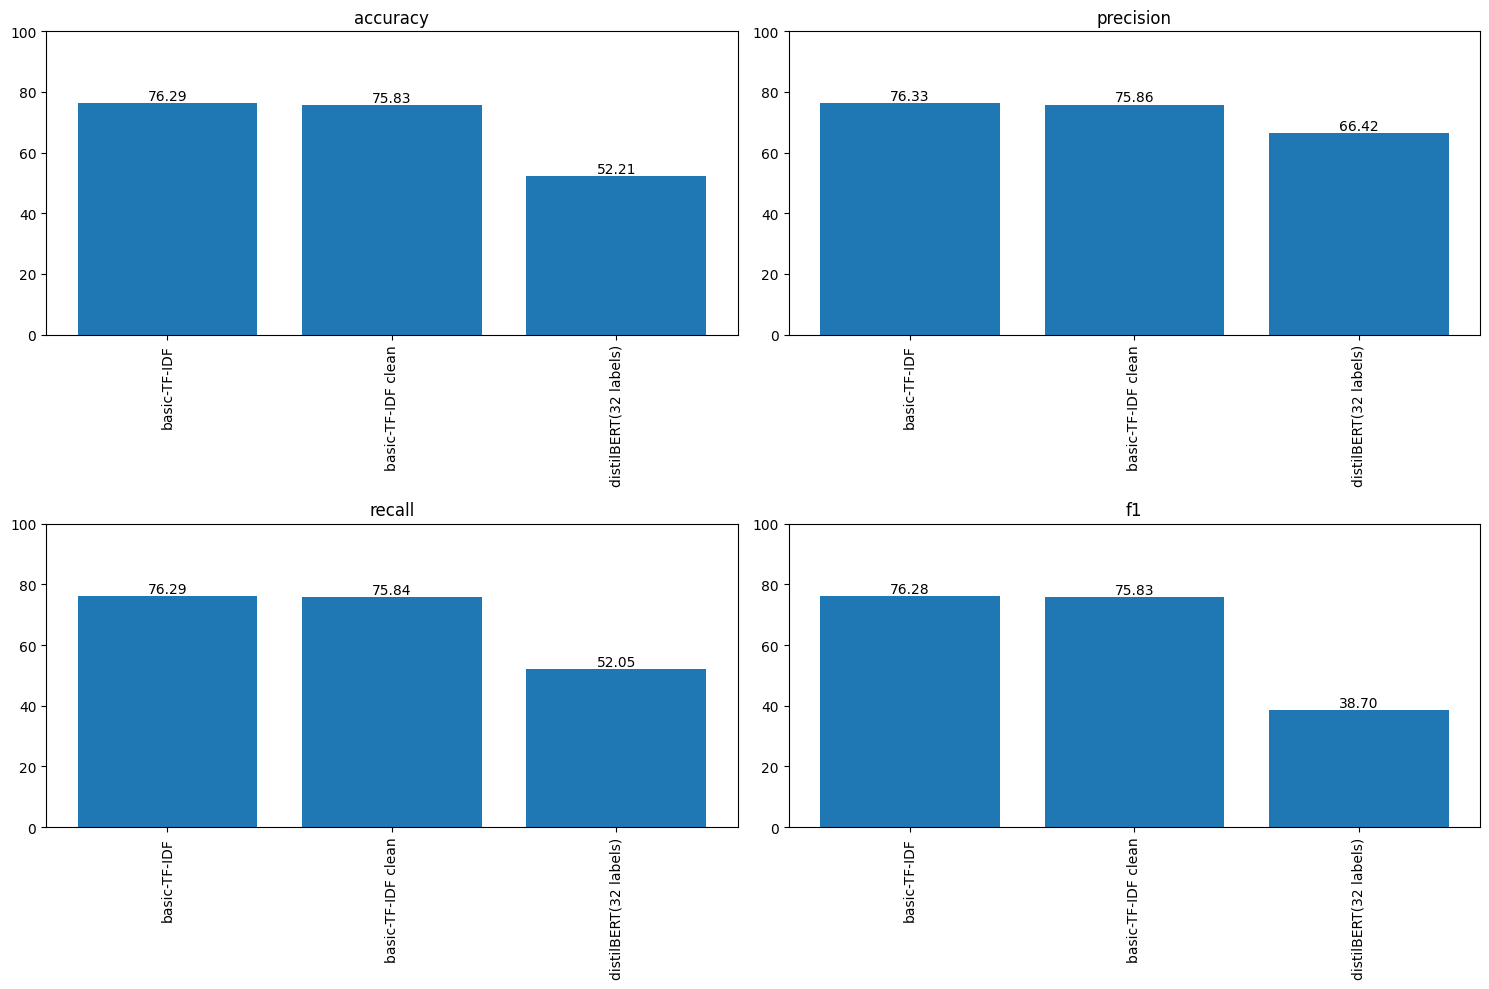

In [35]:
# get the final metrics
metrics_val.run(validation_labels, valid_preds, "distilBERT(32 labels)")
metrics_val.plot()

As we see, BERT trained on 32 labels performs slightly better than random. Note that metrics vary in the range [0.52, 0.62], depending on the run, as all batches are randomly assigned.

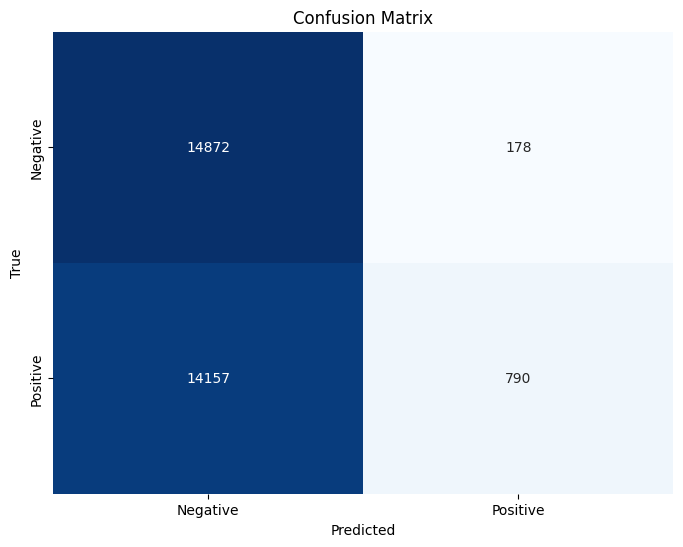

In [36]:
# Calculate confusion matrix
cm = confusion_matrix(validation_labels, valid_preds)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Dataset Augmentation (1 point)

#### Experiment with an automated technique to increase your dataset size without using LLMs. Evaluate the impact on model performance.

In [38]:
# This function should be moved to the top of the notebook (Mikel used it in the first exercise)
# Function for data preprocessing

#getting a library of stopwords and defining a lemmatizer
porter=SnowballStemmer("english")
lmtzr = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

#additional functions

def strip(word):
    mod_string = re.sub(r'\W+', '', word)
    return mod_string

#the following leaves in place two or more capital letters in a row
#will be ignored when using standard stemming
def abbr_or_lower(word):
    if re.match('([A-Z]+[a-z]*){2,}', word):
        return word
    else:
        return word.lower()

#modular pipeline for stemming, lemmatizing and lowercasing
#note this is NOT lemmatizing using grammar pos

def tokenize(text, modulation):
    if modulation<2:
        tokens = re.split(r'\W+', text)
        stems = []
        # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
        for token in tokens:
            lowers=abbr_or_lower(token)
            if lowers not in stop_words:
                if re.search('[a-zA-Z]', lowers):
                    if modulation==0:
                        stems.append(lowers)
                    if modulation==1:
                        stems.append(porter.stem(lowers))
    else:
        sp_text=sp(text)
        stems = []
        lemmatized_text=[]
        for word in sp_text:
            lemmatized_text.append(word.lemma_)
        stems = [abbr_or_lower(strip(w)) for w in lemmatized_text if (abbr_or_lower(strip(w))) and (abbr_or_lower(strip(w)) not in stop_words)]
    return " ".join(stems)


def vectorize(tokens, vocab):
    vector=[]
    for w in vocab:
        vector.append(tokens.count(w))
    return vector

### LDA
I performed some exploratory analysis (aka LDA), but as far as data is very small and randomly chosen to find any patterns is almost imposible and actually is not needed. Probably will just drop this part.

In [39]:
df_train_32['clean_text_tok'] = [tokenize(text, 2) for text in df_train_32['clean_text']]

In [40]:
cv = CountVectorizer(ngram_range = (1,2), lowercase=True, stop_words='english')

cv.fit(df_train_32['clean_text_tok'])

vectorized_text=cv.transform(df_train_32['clean_text_tok'])
vectorized_text=vectorized_text.toarray()
print("document term matrix has size", vectorized_text.shape)

document term matrix has size (32, 305)


In [41]:
dtm_sparse = csr_matrix(vectorized_text)

# Convert sparse matrix to gensim corpus
corpus = Sparse2Corpus(dtm_sparse, documents_columns=False)

# Create gensim dictionary from sklearn CountVectorizer vocabulary
vocabulary_gensim = {}
for key, val in cv.vocabulary_.items():
    vocabulary_gensim[val] = key

dictionary = corpora.Dictionary()
dictionary.id2token = vocabulary_gensim
dictionary.token2id = cv.vocabulary_

In [42]:
# Number of topics
num_topics = 5

# Custom alpha value
alpha = [0.1] * num_topics

# Build LDA model
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=20, random_state=42, alpha=alpha)

# Display the topics
topics = lda_model.print_topics(num_words=30)
print("Custom Alpha and Eta:")
for topic in topics:
    print(topic)


Custom Alpha and Eta:
(0, '0.020*"look" + 0.020*"oh" + 0.011*"leave" + 0.011*"long" + 0.011*"look long" + 0.011*"lol" + 0.011*"suite turn" + 0.011*"turn" + 0.011*"suite" + 0.011*"hang" + 0.011*"leg look" + 0.011*"hang look" + 0.011*"leg" + 0.011*"office" + 0.011*"office suite" + 0.011*"look lol" + 0.011*"cubicle boo" + 0.011*"colbys leg" + 0.011*"colbys" + 0.011*"turn regular" + 0.011*"cubicle" + 0.011*"regular cubicle" + 0.011*"away" + 0.011*"away office" + 0.011*"boo" + 0.011*"long colbys" + 0.011*"regular" + 0.011*"miss" + 0.011*"worried" + 0.011*"oh shit"')
(1, '0.014*"home" + 0.014*"minute" + 0.007*"fun" + 0.007*"controversy use" + 0.007*"political controversy" + 0.007*"eurovision" + 0.007*"eurovision long" + 0.007*"long fun" + 0.007*"controversy" + 0.007*"uni friday" + 0.007*"political" + 0.007*"friday" + 0.007*"use" + 0.007*"use uni" + 0.007*"uni" + 0.007*"fun political" + 0.007*"peace" + 0.007*"home day" + 0.007*"try staff" + 0.007*"try" + 0.007*"day" + 0.007*"hubby try" + 0.00

Text data augmentation approaches include:

+ Synonym Replacement: Replace words with their synonyms.
+ Random Insertion: Insert random words into the text.
+ Random Deletion: Randomly delete words from the text.
+ Random Swap: Swap two words randomly in the text.
+ Text Masking: Replace words or phrases with a mask token.

As far as we have very small dataset (DTM is of shape 32:305) I chose not to work with deletion or masking, but rather with synonyms. I thought of two approaches to do so:

### Data Augmentation: Manually Gathered Synonyms

First approach was to analyse the most common words associated with positive and negative sentiments and manually create a dictionary with synonyms. Then, I augmented data with 50 (tried more, but performance was worse, probably bacause of the limited variety of the changes and the fact, that probably misclassified observations could be misclassified now twice) observations and trained the same BERT with augmented data.

In [47]:
# I had slightly different approach, but changed it to Mikel's so to have the same logic throughout the notebook. Will have to move this and next cell to the first exercise later on.
## Preprocessing texts
pipeline = Pipeline([
        ('prepro', TextPreprocessor()),
        ("vect", CountVectorizer(ngram_range=(1, 2), min_df=0.005, max_df=0.97)),
        ("tfidf", TfidfTransformer(use_idf=True, norm='l1'))
    ]
)

# Fit the pipeline on the training data
pipeline.fit(df_train_32['clean_text'])

Pipeline(steps=[('prepro', TextPreprocessor()),
                ('vect',
                 CountVectorizer(max_df=0.97, min_df=0.005,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(norm='l1'))])

In [48]:
def tfidf_term(pipeline,df,sentiment):
# Access the CountVectorizer step from the pipeline
    count_vectorizer = pipeline.named_steps['vect']
    # Fit and transform the data
    tf_idf_pos_matrix = pipeline.transform(df[df['label']==sentiment]['clean_text'])
    # Convert count matrix to DataFrame
    vec_fr_mtx = pd.DataFrame(data=tf_idf_pos_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

    #Creating a dictionary of frequencies for our terms
    feature_names = count_vectorizer.get_feature_names_out()
    # Calculate Term frequency dictionary
    term_tfidf = np.mean(vec_fr_mtx, axis=0)
    #Store in a dictionary
    tfidf_dict = {i: n for i, n in zip(feature_names, term_tfidf)}
    print(len(term_tfidf))
    return feature_names, term_tfidf, tfidf_dict


def transform_to_dataframe(feature_names, score):
    # Create DataFrame with feature names and mean TF-IDF scores
    df = pd.DataFrame({'terms': feature_names, 'score': score})
    # Reset index
    df.reset_index(drop=True, inplace=True)
    return df


# Example usage:
def plot_freq_top(df,top,pos):
    df = df.sort_values(by='score',ascending = False)
    df = df.head(top)
    #We are going to set the

    # Plot the top N terms and their TF-IDF scores
    plt.figure(figsize=(10, 6))
    plt.barh(df['terms'], df['score'], align='center')
    plt.yticks(df['terms'])
    plt.xlabel('Frequency Score')
    plt.title(pos.format(top))
    #plt.xlim(0,0.010)
    plt.gca().invert_yaxis()  # Invert y-axis to display top terms at the top
    plt.show()

368


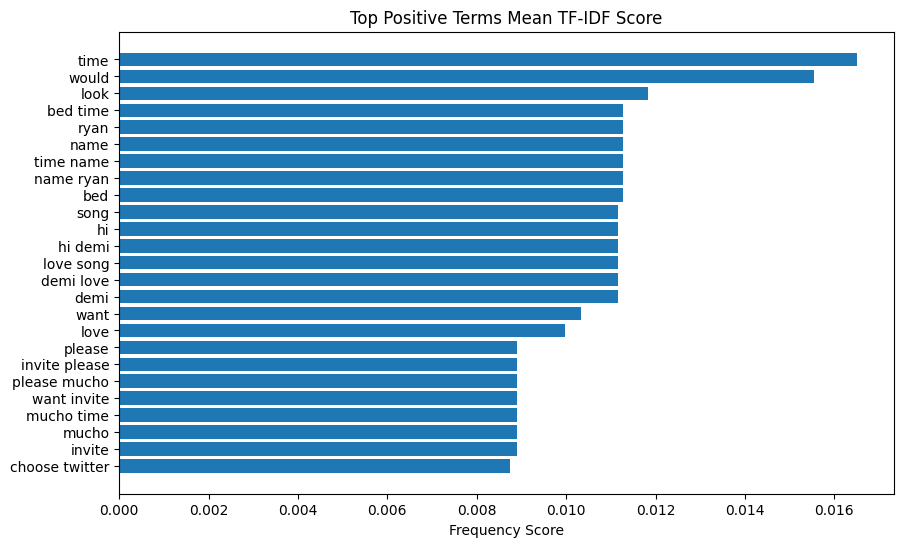

In [56]:
pos = f'Top Positive Terms Mean TF-IDF Score'
## Posive Terms
pos_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train_32,1)
pos_tf_idf = transform_to_dataframe(pos_feature_names,term_tfidf)
plot_freq_top(pos_tf_idf,25,pos)

368


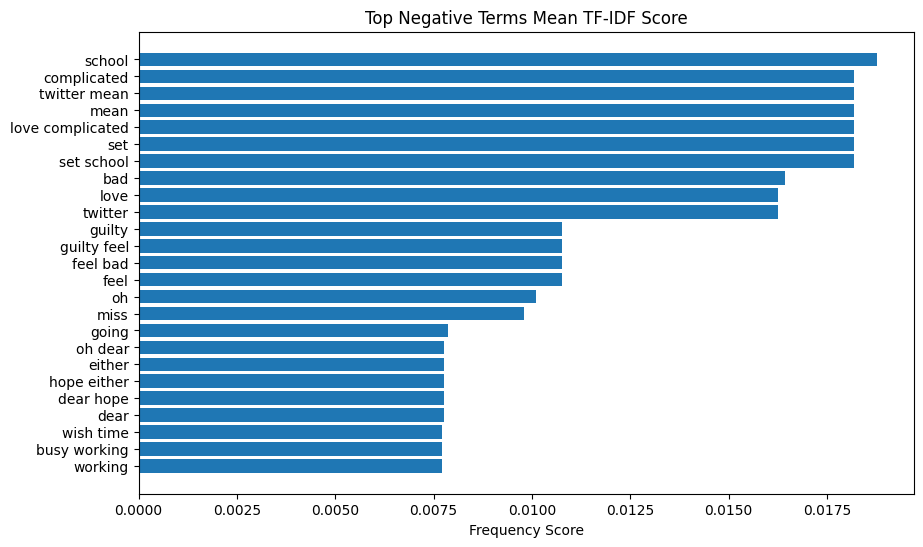

In [57]:
neg = f'Top Negative Terms Mean TF-IDF Score'
## Posive Terms
neg_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train_32,0)
neg_tf_idf = transform_to_dataframe(neg_feature_names,term_tfidf)
plot_freq_top(neg_tf_idf,25,neg)

I got top 'most positive' and 'most negative' terms, manually chose some of them and assigned synonyms.

In [68]:
# Sort the dataframe by the 'score' column in decreasing order
neg_tf_idf_sorted = neg_tf_idf.sort_values(by='score', ascending=False)
pos_tf_idf_sorted = pos_tf_idf.sort_values(by='score', ascending=False)

# Extract the top 25 terms from the sorted dataframe
top_terms_neg = neg_tf_idf_sorted['terms'].head(25).tolist()
top_terms_pos = pos_tf_idf_sorted['terms'].head(25).tolist()

# Print the list of top 25 terms
print(top_terms_neg)
print(top_terms_pos)

['school', 'complicated', 'twitter mean', 'mean', 'love complicated', 'set', 'set school', 'bad', 'love', 'twitter', 'guilty', 'guilty feel', 'feel bad', 'feel', 'oh', 'miss', 'going', 'oh dear', 'either', 'hope either', 'dear hope', 'dear', 'wish time', 'busy working', 'working']
['time', 'would', 'look', 'bed time', 'ryan', 'name', 'time name', 'name ryan', 'bed', 'song', 'hi', 'hi demi', 'love song', 'demi love', 'demi', 'want', 'love', 'please', 'invite please', 'please mucho', 'want invite', 'mucho time', 'mucho', 'invite', 'choose twitter']


In [69]:
synonyms = {
    'school': ['education', 'academy'],
    'complicated': ['complex', 'difficult'],
    'bad': ['poor', 'negative', 'awful', 'lousy', 'rough'],
    'love': ['affection', 'adore', 'care for', 'like'],
    'guilty': ['regret', 'remorse'],
    'feel': ['emotion', 'vibe'],
    'oh': ['ah', 'ahh', 'oops'],
    'miss': ['long for', 'crave', 'feel loss'],
    'going': ['departing', 'leaving', 'traveling'],
    'dear': ['beloved', 'darling', 'precious'],
    'busy': ['occupied', 'engaged'],
    'working': ['laboring', 'employed'],
    'time': ['period', 'duration', 'interval'],
    'would': ['could', 'might', 'will'],
    'look': ['gaze', 'observe', 'glance'],
    'bed time': ['sleep time', 'rest time', 'night time'],
    'song': ['music', 'melody', 'tune'],
    'hi': ['hello', 'hey', 'greetings'],
    'love song': ['romantic music', 'passionate tune'],
    'want': ['desire', 'wish for', 'crave'],
    'please': ['kindly', 'if you please'],
}

In [70]:
# Function to replace key word with a random synonym
def replace_with_synonym(text, synonyms_dict):
    words = text.split()
    for i, word in enumerate(words):
        if word in synonyms_dict:
            synonyms = synonyms_dict[word]
            # Randomly select a synonym
            new_word = random.choice(synonyms)
            # Replace the key word with the selected synonym
            words[i] = new_word
    return ' '.join(words)

# Initialize an empty DataFrame to store new observations
new_rows = pd.DataFrame(columns=df_train_32.columns)

# Generate additional 50 rows
while len(new_rows) < 50:
    # Identify rows with words from synonyms dictionary
    relevant_rows = df_train_32[df_train_32['clean_text'].apply(lambda x: any(word in synonyms for word in x.split()))]
    # Duplicate each relevant row and replace key word with synonym
    for idx, row in relevant_rows.iterrows():
        new_row = row.copy()
        new_row['clean_text'] = replace_with_synonym(row['clean_text'], synonyms)
        new_rows = new_rows.append(new_row, ignore_index=True)
        if len(new_rows) >= 50:
            break

# Display the new DataFrame with 50 new rows
print(new_rows)


                                                 text label text_length  \
0                       Bed time. He has a name. Ryan     1           7   
1      @VivaLaSara  Oh dear! I hope you don't either!     0           8   
2   @Redfrettchen Oh no, shit!  I'm getting a litt...     0          16   
3   @modemlooper Let me know what fake functionali...     1          22   
4                             i hurt my knee real bad     0           6   
5   @playspymaster I want an invite! Please I have...     1          13   
6         Busy working , i wish i had time to be here     0          11   
7   http://twitpic.com/68mye - Hanging Out  Look H...     1          11   
8                         Why is Love so complicated?     0           5   
9         I'm guilty of that too. Feel bad about that     0           9   
10  @vulpesrawr I'm gonna miss my AZN-outings in F...     0           8   
11             @ddlovato hi demi, i love your songs..     1           7   
12  @ian_si @ambermatson.

<ipython-input-70-1219a2151df4>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(new_row, ignore_index=True)


In [71]:
# Add new_rows to df_train_32
augmented_df = pd.concat([df_train_32, new_rows], ignore_index=True)

# Display the augmented DataFrame shape
print(augmented_df.shape)

(82, 8)


In [72]:
# Define data and labels
augmented_df_data = augmented_df['clean_text']
augmented_df_label = augmented_df['label']

Note, that we will work with the same BERT model, so I will not change anything in the model architecture.

In [73]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(augmented_df_label).reshape(-1, 1)).toarray()

In [74]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

X_train = np.array(augmented_df_data)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# Now, pass the wrapped generator to fit
bert_model.fit(batches_with_progress, epochs=7, steps_per_epoch=steps_per_epoch)



Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1/7



Epoch:  50%|█████     | 1/2 [00:11<00:11, 11.67s/it]

1/2 [==============>...............] - ETA: 19s - loss: 0.6149 - recall_1: 0.5938 - precision_1: 0.5938


Epoch: 3it [00:19,  5.82s/it]                       

2/2 [==============================] - 19s 291ms/step - loss: 0.4897 - recall_1: 0.7500 - precision_1: 0.7500
Epoch 2/7



Epoch: 4it [00:19,  3.91s/it]

1/2 [==============>...............] - ETA: 0s - loss: 0.4026 - recall_1: 0.8889 - precision_1: 0.8889


Epoch: 5it [00:19,  2.67s/it]

2/2 [==============================] - 0s 194ms/step - loss: 0.4050 - recall_1: 0.8200 - precision_1: 0.8200
Epoch 3/7



Epoch: 6it [00:19,  1.87s/it]

1/2 [==============>...............] - ETA: 0s - loss: 0.4155 - recall_1: 0.8438 - precision_1: 0.8438


Epoch: 7it [00:20,  1.34s/it]

2/2 [==============================] - 0s 163ms/step - loss: 0.3615 - recall_1: 0.8600 - precision_1: 0.8600
Epoch 4/7



Epoch: 8it [00:20,  1.02it/s]

1/2 [==============>...............] - ETA: 0s - loss: 0.3195 - recall_1: 0.9062 - precision_1: 0.9062


Epoch: 9it [00:20,  1.36it/s]

2/2 [==============================] - 0s 194ms/step - loss: 0.2717 - recall_1: 0.9375 - precision_1: 0.9375
Epoch 5/7



Epoch: 10it [00:20,  1.75it/s]

1/2 [==============>...............] - ETA: 0s - loss: 0.1567 - recall_1: 1.0000 - precision_1: 1.0000


Epoch: 11it [00:20,  2.25it/s]

2/2 [==============================] - 0s 192ms/step - loss: 0.1481 - recall_1: 0.9800 - precision_1: 0.9800
Epoch 6/7



Epoch: 12it [00:20,  2.71it/s]

1/2 [==============>...............] - ETA: 0s - loss: 0.1455 - recall_1: 0.9375 - precision_1: 0.9375


Epoch: 13it [00:21,  3.18it/s]

2/2 [==============================] - 0s 163ms/step - loss: 0.1333 - recall_1: 0.9600 - precision_1: 0.9600
Epoch 7/7



Epoch: 14it [00:21,  3.71it/s]

1/2 [==============>...............] - ETA: 0s - loss: 0.1471 - recall_1: 0.9375 - precision_1: 0.9375


Epoch: 15it [00:21,  4.08it/s]

2/2 [==============================] - 0s 196ms/step - loss: 0.0929 - recall_1: 0.9688 - precision_1: 0.9688


In [75]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(validation_data),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


938/938 [==============================] - 64s 66ms/step


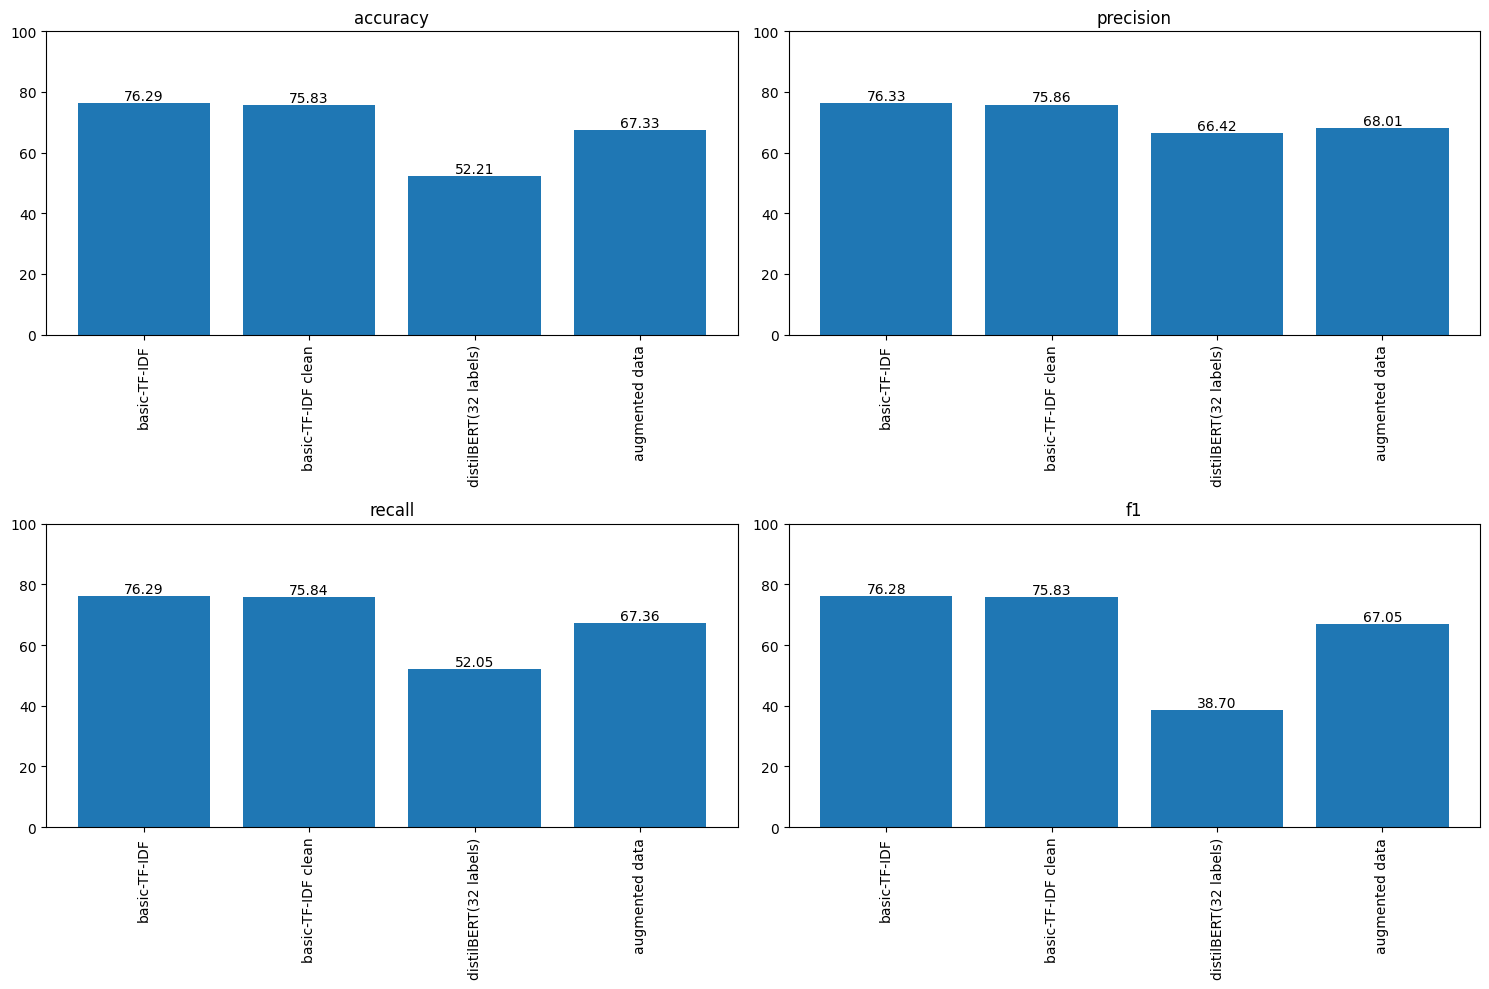

In [76]:
# get the final metrics
metrics_val.run(validation_labels, valid_preds, "augmented data")
metrics_val.plot()

### Data Augmentation: Synonyms from WordNet

I didn't choose to work with WordNet packages in the beginning, as far as synonyms look kind of random and don't usually properly reflect the meaning of the word (probably because of multiple meanings) and don't consider the context. But as far as I couldn't manually assign synonyms to all (or at least many) tokens, I decided to try WordNet as well.

So the second approach is to rendomly change 30% of the tokens in the comments (I tried different shares, 30% performed better) and add 32*20 (tried different numbers as well) new rows.

In [77]:
# Function to get synonyms from WordNet
def get_wordnet_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Function to replace random words with WordNet synonyms
def replace_with_synonym_wordnet(text):
    words = text.split()
    for i, word in enumerate(words):
        # Randomly decide whether to replace the word with a synonym
        if random.random() < 0.3:  # Adjust the probability as needed
            # Get WordNet synonyms for the word
            synonyms = get_wordnet_synonyms(word)
            if synonyms:
                # Randomly select a synonym
                new_word = random.choice(synonyms)
                # Replace the word with the selected synonym
                words[i] = new_word
    return ' '.join(words)

# Duplicate each row and replace random words with WordNet synonyms
new_rows = pd.DataFrame(columns=df_train_32.columns)
for idx, row in df_train_32.iterrows():
    for _ in range(20):  # Duplicate 20 times - can be adjusted as needed
        # Duplicate the row
        new_row = row.copy()
        # Replace random words in the 'clean_text' column with WordNet synonyms
        new_row['clean_text'] = replace_with_synonym_wordnet(row['clean_text'])
        # Append the new row to the DataFrame
        new_rows = new_rows.append(new_row, ignore_index=True)

# Display the new DataFrame with duplicated rows and random word replacements
print(new_rows.head())


<ipython-input-77-e1efff39fb8a>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(new_row, ignore_index=True)


                            text label text_length  \
0  Bed time. He has a name. Ryan     1           7   
1  Bed time. He has a name. Ryan     1           7   
2  Bed time. He has a name. Ryan     1           7   
3  Bed time. He has a name. Ryan     1           7   
4  Bed time. He has a name. Ryan     1           7   

                                     clean_text clean_emotions hashtag  \
0           bed time . helium has a name . ryan                          
1         go_to_bed time . he has A name . ryan                          
2               bed time . he has a name . ryan                          
3             bed time . he has a advert . ryan                          
4  bed time . atomic_number_2 has a name . ryan                          

                       text_emotion      clean_text_tok  
0  bed time . he has a name . ryan   bed time name ryan  
1  bed time . he has a name . ryan   bed time name ryan  
2  bed time . he has a name . ryan   bed time name ryan 

From the printed first rows you actually may see (comparing text and clean text, which was duplicated), that synonyms are kind of weird.

In [78]:
# Add new_rows to df_train_32
augmented_df = pd.concat([df_train_32, new_rows], ignore_index=True)

# Display the augmented DataFrame
print(augmented_df.shape)

(672, 8)


In [79]:
augmented_df_data = augmented_df['clean_text']
augmented_df_label = augmented_df['label']

In [80]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(augmented_df_label).reshape(-1, 1)).toarray()

In [81]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

X_train = np.array(augmented_df_data)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# Now, pass the wrapped generator to fit
bert_model.fit(batches_with_progress, epochs=7, steps_per_epoch=steps_per_epoch)




Epoch:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 1/7




Epoch:   5%|▍         | 1/21 [00:11<03:53, 11.66s/it]

 1/21 [>.............................] - ETA: 6:18 - loss: 0.1525 - recall_2: 0.9375 - precision_2: 0.9375



Epoch:  14%|█▍        | 3/21 [00:19<01:43,  5.75s/it]

 2/21 [=>............................] - ETA: 4s - loss: 0.1697 - recall_2: 0.9375 - precision_2: 0.9375  



Epoch:  19%|█▉        | 4/21 [00:19<01:05,  3.85s/it]

 3/21 [===>..........................] - ETA: 3s - loss: 0.1971 - recall_2: 0.9271 - precision_2: 0.9271



Epoch:  24%|██▍       | 5/21 [00:19<00:42,  2.64s/it]

 4/21 [====>.........................] - ETA: 3s - loss: 0.1957 - recall_2: 0.9297 - precision_2: 0.9297



Epoch:  29%|██▊       | 6/21 [00:19<00:27,  1.85s/it]

 5/21 [======>.......................] - ETA: 3s - loss: 0.1896 - recall_2: 0.9312 - precision_2: 0.9312



Epoch:  33%|███▎      | 7/21 [00:19<00:18,  1.33s/it]

 6/21 [=======>......................] - ETA: 3s - loss: 0.1823 - recall_2: 0.9323 - precision_2: 0.9323



Epoch:  38%|███▊      | 8/21 [00:20<00:12,  1.02it/s]

 7/21 [=========>....................] - ETA: 2s - loss: 0.1643 - recall_2: 0.9420 - precision_2: 0.9420



Epoch:  43%|████▎     | 9/21 [00:20<00:08,  1.36it/s]

 8/21 [==========>...................] - ETA: 2s - loss: 0.1537 - recall_2: 0.9492 - precision_2: 0.9492



Epoch:  48%|████▊     | 10/21 [00:20<00:06,  1.75it/s]

 9/21 [===========>..................] - ETA: 2s - loss: 0.1453 - recall_2: 0.9514 - precision_2: 0.9514



Epoch:  52%|█████▏    | 11/21 [00:20<00:04,  2.20it/s]

10/21 [=============>................] - ETA: 2s - loss: 0.1327 - recall_2: 0.9563 - precision_2: 0.9563



Epoch:  57%|█████▋    | 12/21 [00:20<00:03,  2.67it/s]

11/21 [==============>...............] - ETA: 1s - loss: 0.1218 - recall_2: 0.9602 - precision_2: 0.9602



Epoch:  62%|██████▏   | 13/21 [00:21<00:02,  3.13it/s]

12/21 [================>.............] - ETA: 1s - loss: 0.1133 - recall_2: 0.9635 - precision_2: 0.9635



Epoch:  67%|██████▋   | 14/21 [00:21<00:01,  3.55it/s]

13/21 [=================>............] - ETA: 1s - loss: 0.1060 - recall_2: 0.9663 - precision_2: 0.9663



Epoch:  71%|███████▏  | 15/21 [00:21<00:01,  3.92it/s]

14/21 [===================>..........] - ETA: 1s - loss: 0.1004 - recall_2: 0.9688 - precision_2: 0.9688



Epoch:  76%|███████▌  | 16/21 [00:21<00:01,  4.24it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0952 - recall_2: 0.9708 - precision_2: 0.9708



Epoch:  81%|████████  | 17/21 [00:21<00:00,  4.48it/s]

16/21 [=====================>........] - ETA: 0s - loss: 0.0910 - recall_2: 0.9727 - precision_2: 0.9727



Epoch:  86%|████████▌ | 18/21 [00:21<00:00,  4.68it/s]

17/21 [=======================>......] - ETA: 0s - loss: 0.0867 - recall_2: 0.9743 - precision_2: 0.9743



Epoch:  90%|█████████ | 19/21 [00:22<00:00,  4.83it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0827 - recall_2: 0.9757 - precision_2: 0.9757



Epoch:  95%|█████████▌| 20/21 [00:22<00:00,  4.93it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0787 - recall_2: 0.9770 - precision_2: 0.9770



Epoch: 100%|██████████| 21/21 [00:22<00:00,  5.00it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0762 - recall_2: 0.9781 - precision_2: 0.9781



Epoch: 22it [00:22,  5.07it/s]                        

21/21 [==============================] - 23s 195ms/step - loss: 0.0735 - recall_2: 0.9792 - precision_2: 0.9792
Epoch 2/7




Epoch: 23it [00:22,  5.03it/s]

 1/21 [>.............................] - ETA: 3s - loss: 0.0046 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 24it [00:23,  5.08it/s]

 2/21 [=>............................] - ETA: 3s - loss: 0.0041 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 25it [00:23,  5.12it/s]

 3/21 [===>..........................] - ETA: 3s - loss: 0.0038 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 26it [00:23,  5.14it/s]

 4/21 [====>.........................] - ETA: 3s - loss: 0.0033 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 27it [00:23,  5.17it/s]

 5/21 [======>.......................] - ETA: 3s - loss: 0.0032 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 28it [00:23,  5.17it/s]

 6/21 [=======>......................] - ETA: 2s - loss: 0.0031 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 29it [00:24,  5.19it/s]

 7/21 [=========>....................] - ETA: 2s - loss: 0.0030 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 30it [00:24,  5.18it/s]

 8/21 [==========>...................] - ETA: 2s - loss: 0.0032 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 31it [00:24,  5.20it/s]

 9/21 [===========>..................] - ETA: 2s - loss: 0.0034 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 32it [00:24,  5.21it/s]

10/21 [=============>................] - ETA: 2s - loss: 0.0034 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 33it [00:24,  5.19it/s]

11/21 [==============>...............] - ETA: 1s - loss: 0.0033 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 34it [00:25,  5.20it/s]

12/21 [================>.............] - ETA: 1s - loss: 0.0042 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 35it [00:25,  5.20it/s]

13/21 [=================>............] - ETA: 1s - loss: 0.0040 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 36it [00:25,  5.20it/s]

14/21 [===================>..........] - ETA: 1s - loss: 0.0038 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 37it [00:25,  5.21it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0037 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 38it [00:25,  5.20it/s]

16/21 [=====================>........] - ETA: 0s - loss: 0.0037 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 39it [00:26,  5.20it/s]

17/21 [=======================>......] - ETA: 0s - loss: 0.0035 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 40it [00:26,  5.20it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0034 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 41it [00:26,  5.19it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0034 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 42it [00:26,  5.19it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0034 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 43it [00:26,  5.20it/s]

21/21 [==============================] - 4s 193ms/step - loss: 0.0032 - recall_2: 1.0000 - precision_2: 1.0000
Epoch 3/7




Epoch: 44it [00:26,  5.11it/s]

 1/21 [>.............................] - ETA: 3s - loss: 0.0011 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 45it [00:27,  5.14it/s]

 2/21 [=>............................] - ETA: 3s - loss: 8.4277e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 46it [00:27,  5.16it/s]

 3/21 [===>..........................] - ETA: 3s - loss: 9.1829e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 47it [00:27,  5.18it/s]

 4/21 [====>.........................] - ETA: 3s - loss: 8.3642e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 48it [00:27,  5.19it/s]

 5/21 [======>.......................] - ETA: 3s - loss: 8.1530e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 49it [00:27,  5.17it/s]

 6/21 [=======>......................] - ETA: 2s - loss: 7.9566e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 50it [00:28,  5.18it/s]

 7/21 [=========>....................] - ETA: 2s - loss: 7.8420e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 51it [00:28,  5.19it/s]

 8/21 [==========>...................] - ETA: 2s - loss: 8.7156e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 52it [00:28,  5.19it/s]

 9/21 [===========>..................] - ETA: 2s - loss: 8.2340e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 53it [00:28,  5.21it/s]

10/21 [=============>................] - ETA: 2s - loss: 7.8215e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 54it [00:28,  5.19it/s]

11/21 [==============>...............] - ETA: 1s - loss: 7.5386e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 55it [00:29,  5.19it/s]

12/21 [================>.............] - ETA: 1s - loss: 7.1754e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 56it [00:29,  5.19it/s]

13/21 [=================>............] - ETA: 1s - loss: 6.9231e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 57it [00:29,  5.20it/s]

14/21 [===================>..........] - ETA: 1s - loss: 6.6926e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 58it [00:29,  5.20it/s]

15/21 [====================>.........] - ETA: 1s - loss: 6.7777e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 59it [00:29,  5.21it/s]

16/21 [=====================>........] - ETA: 0s - loss: 6.7671e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 60it [00:30,  5.20it/s]

17/21 [=======================>......] - ETA: 0s - loss: 6.6657e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 61it [00:30,  5.19it/s]

18/21 [========================>.....] - ETA: 0s - loss: 6.7123e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 62it [00:30,  5.18it/s]

19/21 [==========================>...] - ETA: 0s - loss: 7.0164e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 63it [00:30,  5.18it/s]

20/21 [===========================>..] - ETA: 0s - loss: 6.8398e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 64it [00:30,  5.18it/s]

21/21 [==============================] - 4s 193ms/step - loss: 6.7805e-04 - recall_2: 1.0000 - precision_2: 1.0000
Epoch 4/7




Epoch: 65it [00:31,  5.09it/s]

 1/21 [>.............................] - ETA: 3s - loss: 2.8886e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 66it [00:31,  5.13it/s]

 2/21 [=>............................] - ETA: 3s - loss: 3.3928e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 67it [00:31,  5.15it/s]

 3/21 [===>..........................] - ETA: 3s - loss: 3.5467e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 68it [00:31,  5.17it/s]

 4/21 [====>.........................] - ETA: 3s - loss: 3.4167e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 69it [00:31,  5.16it/s]

 5/21 [======>.......................] - ETA: 3s - loss: 3.4636e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 70it [00:32,  5.17it/s]

 6/21 [=======>......................] - ETA: 2s - loss: 3.5953e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 71it [00:32,  5.16it/s]

 7/21 [=========>....................] - ETA: 2s - loss: 3.5652e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 72it [00:32,  5.18it/s]

 8/21 [==========>...................] - ETA: 2s - loss: 3.7259e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 73it [00:32,  5.18it/s]

 9/21 [===========>..................] - ETA: 2s - loss: 3.6951e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 74it [00:32,  5.19it/s]

10/21 [=============>................] - ETA: 2s - loss: 3.6579e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 75it [00:32,  5.19it/s]

11/21 [==============>...............] - ETA: 1s - loss: 3.6406e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 76it [00:33,  5.17it/s]

12/21 [================>.............] - ETA: 1s - loss: 3.7239e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 77it [00:33,  5.16it/s]

13/21 [=================>............] - ETA: 1s - loss: 3.5439e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 78it [00:33,  5.15it/s]

14/21 [===================>..........] - ETA: 1s - loss: 3.4851e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 79it [00:33,  5.16it/s]

15/21 [====================>.........] - ETA: 1s - loss: 3.4781e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 80it [00:33,  5.17it/s]

16/21 [=====================>........] - ETA: 0s - loss: 3.3799e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 81it [00:34,  5.15it/s]

17/21 [=======================>......] - ETA: 0s - loss: 3.3267e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 82it [00:34,  5.16it/s]

18/21 [========================>.....] - ETA: 0s - loss: 3.3767e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 83it [00:34,  5.18it/s]

19/21 [==========================>...] - ETA: 0s - loss: 3.5235e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 84it [00:34,  5.18it/s]

20/21 [===========================>..] - ETA: 0s - loss: 3.4992e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 85it [00:34,  5.17it/s]

21/21 [==============================] - 4s 194ms/step - loss: 3.4503e-04 - recall_2: 1.0000 - precision_2: 1.0000
Epoch 5/7




Epoch: 86it [00:35,  5.10it/s]

 1/21 [>.............................] - ETA: 3s - loss: 2.7965e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 87it [00:35,  5.12it/s]

 2/21 [=>............................] - ETA: 3s - loss: 3.3859e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 88it [00:35,  5.13it/s]

 3/21 [===>..........................] - ETA: 3s - loss: 2.9902e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 89it [00:35,  5.14it/s]

 4/21 [====>.........................] - ETA: 3s - loss: 2.9839e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 90it [00:35,  5.15it/s]

 5/21 [======>.......................] - ETA: 3s - loss: 3.4152e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 91it [00:36,  5.13it/s]

 6/21 [=======>......................] - ETA: 2s - loss: 3.2551e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 92it [00:36,  5.14it/s]

 7/21 [=========>....................] - ETA: 2s - loss: 3.0267e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 93it [00:36,  5.15it/s]

 8/21 [==========>...................] - ETA: 2s - loss: 2.8576e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 94it [00:36,  5.16it/s]

 9/21 [===========>..................] - ETA: 2s - loss: 2.7940e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 95it [00:36,  5.16it/s]

10/21 [=============>................] - ETA: 2s - loss: 3.5440e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 96it [00:37,  5.13it/s]

11/21 [==============>...............] - ETA: 1s - loss: 3.4326e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 97it [00:37,  5.15it/s]

12/21 [================>.............] - ETA: 1s - loss: 3.3978e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 98it [00:37,  5.15it/s]

13/21 [=================>............] - ETA: 1s - loss: 3.3018e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 99it [00:37,  5.16it/s]

14/21 [===================>..........] - ETA: 1s - loss: 3.2174e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 100it [00:37,  5.17it/s]

15/21 [====================>.........] - ETA: 1s - loss: 3.3952e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 101it [00:38,  5.15it/s]

16/21 [=====================>........] - ETA: 0s - loss: 3.2509e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 102it [00:38,  5.13it/s]

17/21 [=======================>......] - ETA: 0s - loss: 3.2086e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 103it [00:38,  5.14it/s]

18/21 [========================>.....] - ETA: 0s - loss: 3.0878e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 104it [00:38,  5.16it/s]

19/21 [==========================>...] - ETA: 0s - loss: 3.1228e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 105it [00:38,  5.14it/s]

20/21 [===========================>..] - ETA: 0s - loss: 3.0578e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 106it [00:38,  5.12it/s]

21/21 [==============================] - 4s 195ms/step - loss: 2.9828e-04 - recall_2: 1.0000 - precision_2: 1.0000
Epoch 6/7




Epoch: 107it [00:39,  5.05it/s]

 1/21 [>.............................] - ETA: 3s - loss: 1.2785e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 108it [00:39,  5.09it/s]

 2/21 [=>............................] - ETA: 3s - loss: 1.6334e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 109it [00:39,  5.13it/s]

 3/21 [===>..........................] - ETA: 3s - loss: 1.6302e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 110it [00:39,  5.14it/s]

 4/21 [====>.........................] - ETA: 3s - loss: 2.0826e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 111it [00:39,  5.13it/s]

 5/21 [======>.......................] - ETA: 3s - loss: 2.1426e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 112it [00:40,  5.14it/s]

 6/21 [=======>......................] - ETA: 2s - loss: 2.3127e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 113it [00:40,  5.14it/s]

 7/21 [=========>....................] - ETA: 2s - loss: 2.3555e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 114it [00:40,  5.13it/s]

 8/21 [==========>...................] - ETA: 2s - loss: 2.6274e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 115it [00:40,  5.14it/s]

 9/21 [===========>..................] - ETA: 2s - loss: 2.4730e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 116it [00:40,  5.13it/s]

10/21 [=============>................] - ETA: 2s - loss: 2.3626e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 117it [00:41,  5.12it/s]

11/21 [==============>...............] - ETA: 1s - loss: 2.3360e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 118it [00:41,  5.13it/s]

12/21 [================>.............] - ETA: 1s - loss: 2.2675e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 119it [00:41,  5.13it/s]

13/21 [=================>............] - ETA: 1s - loss: 2.1688e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 120it [00:41,  5.14it/s]

14/21 [===================>..........] - ETA: 1s - loss: 2.1885e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 121it [00:41,  5.12it/s]

15/21 [====================>.........] - ETA: 1s - loss: 2.2176e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 122it [00:42,  5.13it/s]

16/21 [=====================>........] - ETA: 0s - loss: 2.1935e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 123it [00:42,  5.13it/s]

17/21 [=======================>......] - ETA: 0s - loss: 2.1760e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 124it [00:42,  5.12it/s]

18/21 [========================>.....] - ETA: 0s - loss: 2.1035e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 125it [00:42,  5.12it/s]

19/21 [==========================>...] - ETA: 0s - loss: 2.0662e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 126it [00:42,  5.12it/s]

20/21 [===========================>..] - ETA: 0s - loss: 2.0439e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 127it [00:43,  5.10it/s]

21/21 [==============================] - 4s 195ms/step - loss: 1.9983e-04 - recall_2: 1.0000 - precision_2: 1.0000
Epoch 7/7




Epoch: 128it [00:43,  5.03it/s]

 1/21 [>.............................] - ETA: 3s - loss: 2.7591e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 129it [00:43,  5.08it/s]

 2/21 [=>............................] - ETA: 3s - loss: 2.0648e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 130it [00:43,  5.10it/s]

 3/21 [===>..........................] - ETA: 3s - loss: 2.6735e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 131it [00:43,  5.11it/s]

 4/21 [====>.........................] - ETA: 3s - loss: 2.6045e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 132it [00:44,  5.10it/s]

 5/21 [======>.......................] - ETA: 3s - loss: 2.2854e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 133it [00:44,  5.10it/s]

 6/21 [=======>......................] - ETA: 2s - loss: 2.1266e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 134it [00:44,  5.09it/s]

 7/21 [=========>....................] - ETA: 2s - loss: 1.9583e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 135it [00:44,  5.11it/s]

 8/21 [==========>...................] - ETA: 2s - loss: 1.9973e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 136it [00:44,  5.10it/s]

 9/21 [===========>..................] - ETA: 2s - loss: 2.0193e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 137it [00:45,  5.10it/s]

10/21 [=============>................] - ETA: 2s - loss: 2.1247e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 138it [00:45,  5.11it/s]

11/21 [==============>...............] - ETA: 1s - loss: 2.0863e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 139it [00:45,  5.12it/s]

12/21 [================>.............] - ETA: 1s - loss: 2.0578e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 140it [00:45,  5.11it/s]

13/21 [=================>............] - ETA: 1s - loss: 2.0853e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 141it [00:45,  5.11it/s]

14/21 [===================>..........] - ETA: 1s - loss: 1.9878e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 142it [00:46,  5.12it/s]

15/21 [====================>.........] - ETA: 1s - loss: 2.0084e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 143it [00:46,  5.11it/s]

16/21 [=====================>........] - ETA: 0s - loss: 1.9602e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 144it [00:46,  5.10it/s]

17/21 [=======================>......] - ETA: 0s - loss: 2.3751e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 145it [00:46,  5.10it/s]

18/21 [========================>.....] - ETA: 0s - loss: 2.3116e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 146it [00:46,  5.10it/s]

19/21 [==========================>...] - ETA: 0s - loss: 2.2949e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 147it [00:47,  5.10it/s]

20/21 [===========================>..] - ETA: 0s - loss: 2.2321e-04 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 148it [00:47,  5.10it/s]

21/21 [==============================] - 4s 196ms/step - loss: 2.2274e-04 - recall_2: 1.0000 - precision_2: 1.0000


In [82]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(validation_data),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


938/938 [==============================] - 64s 67ms/step


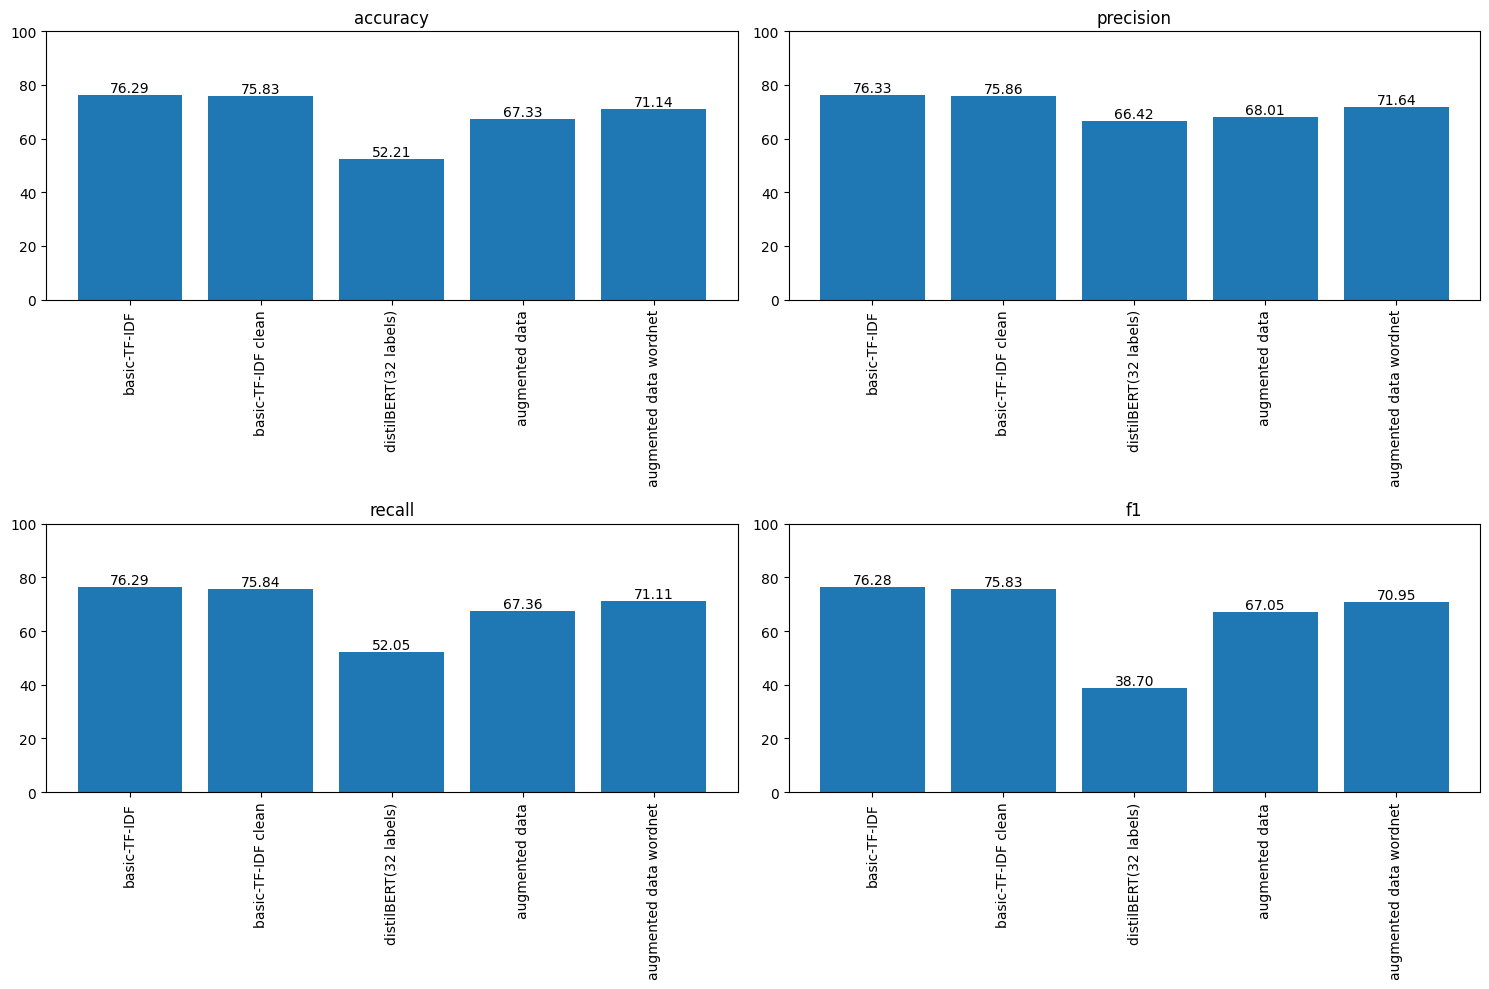

In [83]:
# get the final metrics
metrics_val.run(validation_labels, valid_preds, "augmented data wordnet")
metrics_val.plot()